In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
from matplotlib.lines import Line2D

plt.style.use('science')
matplotlib.rcParams.update({'font.size': 23})

In [2]:
low_f_results = np.loadtxt('../Result_files/low_f/final_best_positions.txt')
high_f_results = np.loadtxt('../Result_files/high_f/final_best_positions.txt')


In [3]:
search_results = []


In [4]:
search_results.extend(list(high_f_results[high_f_results[:,-1]>90]))

In [5]:
search_results.extend(list(low_f_results[low_f_results[:,-1]>90]))

In [6]:
search_results = np.array(search_results)

In [7]:
catalog = pd.read_csv('../Fig1b/catalog.csv')

In [8]:
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])

In [9]:
catalog

,Name,EclipticLatitude,EclipticLongitude,Mass1,Mass2,Spin1,Spin2,Inclination,InitialFrequency,InitialPhase,Polarization,Redshift,Distance,ObservationDuration,Cadence
0,Source 1,0.951881,5.683863,35.432815,32.089232,0.763621,0.206713,2.979326,0.005858,3.394436,3.176550,0.034875,159.904954,6.311630e+07,5
1,Source 5,0.078151,3.504416,34.499636,28.802451,-0.681947,-0.385757,0.738223,0.012243,1.996578,1.861111,0.036661,168.310236,6.311630e+07,5
2,Source 8,0.104561,1.691095,33.712362,19.926473,-0.022495,0.032351,1.526063,0.027654,2.186094,1.624495,0.007569,34.013334,6.311630e+07,5
3,Source 9,-0.654182,0.802623,30.724619,29.227329,0.123650,0.078372,2.075090,0.023768,1.341579,5.384847,0.018876,85.540696,6.311630e+07,5
4,Source 10,-1.235802,3.288491,48.087722,42.093315,-0.110226,0.194370,2.685023,0.011311,3.138914,1.999555,0.036789,168.911407,6.311630e+07,5


In [10]:
delta_mc = []
delta_lambda = []
delta_beta = []
delta_f_low = []

In [11]:

for index, sobbh in catalog.iterrows():
    print(sobbh['Name'])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = sobbh['EclipticLatitude']
    ecliptic_long = sobbh['EclipticLongitude']
    f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    
    print('Delta mc:',np.abs(search_results[index][0]-mc),np.abs(search_results[index][0]-mc)/mc)
    print('Delta lambda: ',np.abs(search_results[index][5]-ecliptic_long),np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    print('Delta beta: ',np.abs(search_results[index][6]-ecliptic_lat),np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    print('Delta f_low: ',np.abs(search_results[index][4]-f_low),np.abs(search_results[index][4]-f_low)/f_low)
    print('Max upsilon: ',max_upsilon)

    delta_mc.append(np.abs(search_results[index][0]-mc)/mc)
    delta_lambda.append(np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    delta_beta.append(np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    delta_f_low.append(np.abs(search_results[index][4]-f_low)/f_low)
    
    
    print('\n')

        

Source 1
Delta mc: 8.34036492065593e-05 2.8419418447196595e-06
Delta lambda:  0.0006965587954317343 0.00012255025418589146
Delta beta:  0.012896062645322393 0.013547973592495207
Delta f_low:  3.44319192949194e-10 5.877452542522639e-08
Max upsilon:  152.68924453058963


Source 5
Delta mc: 0.0020685510686675457 7.544031270673146e-05
Delta lambda:  0.0020990627634676073 0.0005989765553394331
Delta beta:  0.02697485736577203 0.3451645303187898
Delta f_low:  3.1873966677836707e-09 2.603501493336725e-07
Max upsilon:  151.83822518591094


Source 8
Delta mc: 0.0014468587586122794 6.45639704153693e-05
Delta lambda:  0.00548618643433163 0.003244161269737181
Delta beta:  0.04789860006539766 0.4580939283158538
Delta f_low:  3.663060146874564e-08 1.3245856348031968e-06
Max upsilon:  409.1774803301429


Source 9
Delta mc: 0.004867799424012276 0.0001866070104773187
Delta lambda:  0.006846515966410172 0.008530179382985443
Delta beta:  0.01974273176881025 0.030179244804044384
Delta f_low:  4.8118067003

# Gapped sources

In [12]:
gapped_delta_mc = []
gapped_delta_f_low = []
for index,row in catalog.iterrows():
    print(row['Name'])
    final_swarm_data = np.loadtxt('Gapped/' + row['Name'] + '/best_position_and_value.txt')
    best_position= final_swarm_data[:-1]
    best_value = final_swarm_data[-1]

    m1 = row['Mass1']
    m2 = row['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)

    f_low = row['InitialFrequency']

    print('Delta mc:',np.abs(best_position[0]-mc),np.abs(best_position[0]-mc)/mc)
    print('Delta f_low: ',np.abs(best_position[4]-f_low),np.abs(best_position[4]-f_low)/f_low)
    print('\n')

    gapped_delta_mc.append(np.abs(best_position[0]-mc)/mc)
    gapped_delta_f_low.append(np.abs(best_position[4]-f_low)/f_low)


Source 1
Delta mc: 0.0016944685907560597 5.773825532149588e-05
Delta f_low:  3.2858626462101137e-09 5.608894932324453e-07


Source 5
Delta mc: 0.001123957346113258 4.099086309453826e-05
Delta f_low:  3.4911011182608975e-09 2.851570708675484e-07


Source 8
Delta mc: 0.0014236111605470114 6.35265801208571e-05
Delta f_low:  3.506269333902745e-08 1.2678890886903007e-06


Source 9
Delta mc: 0.004082391748564618 0.00015649842021818602
Delta f_low:  4.835895614160868e-08 2.0346384351509126e-06


Source 10
Delta mc: 0.0007303224978869594 1.8654745344962776e-05
Delta f_low:  3.1749218115662003e-09 2.8069013500599776e-07




In [13]:
delta_mc = np.array(delta_mc).flatten()
delta_f_low = np.array(delta_f_low).flatten()

In [14]:

# 1. Grab five discrete colours from 'viridis'
colors = cm.get_cmap('viridis', 5).colors

# 2. Build a ListedColormap
cmap = mcolors.ListedColormap(colors, name='viridis5')

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_3264/328101569.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', 5).colors


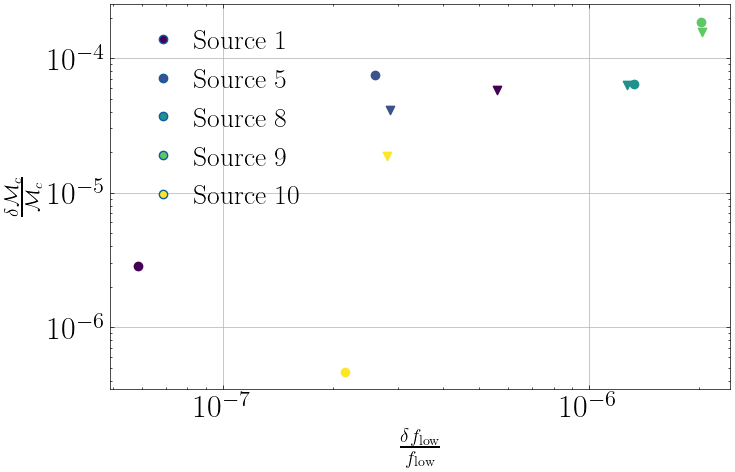

In [19]:
plt.figure(figsize=(8,5))

for i in range(delta_mc.size):

    plt.scatter(delta_f_low[i],delta_mc[i],color=cmap(i),marker='o')
    plt.scatter(gapped_delta_f_low[i],gapped_delta_mc[i],color=cmap(i),marker='v')



plt.ylabel(r'$\frac{\delta \mathcal{M}_c}{\mathcal{M}_c}$',fontsize=20)
plt.xlabel(r'$\frac{\delta f_{\mathrm{low}}}{f_{\mathrm{low}}}$',fontsize=20)



labels = ['Source 1', 'Source 5', 'Source 8', 'Source 9', 'Source 10']
marker_style = 'D'        # diamond; swap for 'o', '^', '*', 's', etc.

handles = [Line2D([], [], marker='o', linestyle='',
                  markerfacecolor=col)   # edge so marker stands out
           for col in cmap.colors]

plt.legend(handles=handles,
          labels=labels,handletextpad=0.1,frameon=False,fontsize=20)

plt.semilogy()
plt.semilogx()
plt.grid()
plt.savefig('Fractional_errors.pdf')
plt.show()